In [1]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

(30, 30) min, max:  15.39249121 18.72840672


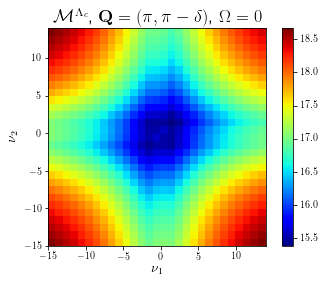

In [29]:
    plt.clf()

    cmap = 'jet'
    matriciona = np.loadtxt('./Phi_mag.txt')

    center = matriciona.shape[0]/2
    print np.shape(matriciona), "min, max: ", np.min(matriciona), np.max(matriciona)
    x = np.arange(-matriciona.shape[0]/2, matriciona.shape[0]/2)
   
    plt.pcolormesh(x,x,matriciona[:],cmap=cmap)
    plt.colorbar(orientation= "vertical")
 
    plt.xlim([x[0],x[-1]])
    plt.ylim([x[0],x[-1]])

    plt.xlabel(r'$\nu_1$', fontsize=14)
    plt.ylabel(r'$\nu_2$', fontsize=14)
    plt.gca().set_aspect(1)
    
    plt.title(r'$\mathcal{M}^{\mathrm{\Lambda}_c}$, $\mathbf{Q}=(\pi,\pi-\delta)$, $\Omega=0$', fontsize=18)
    #plt.savefig('Phi_mag.png',dpi=300)

(30, 30) min, max:  -125.00753604 -5.57281919


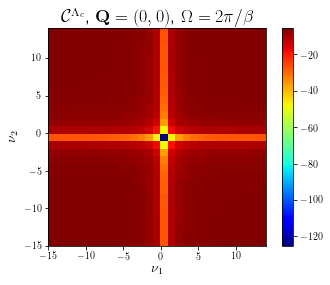

In [30]:
    plt.clf()

    matriciona = np.loadtxt('./Phi_den.txt')

    center = matriciona.shape[0]/2
    print np.shape(matriciona), "min, max: ", np.min(matriciona), np.max(matriciona)
    x = np.arange(-matriciona.shape[0]/2, matriciona.shape[0]/2)
   
    plt.pcolormesh(x,x,matriciona[:],cmap=cmap)
    plt.colorbar(orientation= "vertical")
 
    plt.xlim([x[0],x[-1]])
    plt.ylim([x[0],x[-1]])

    plt.xlabel(r'$\nu_1$', fontsize=14)
    plt.ylabel(r'$\nu_2$', fontsize=14)
    plt.gca().set_aspect(1)
    
    plt.title(r'$\mathcal{C}^{\mathrm{\Lambda}_c}$, $\mathbf{Q}=(0,0)$, $\Omega=2\pi/\beta$', fontsize=18)
    #plt.savefig('Phi_den.png')

In [25]:
def create_mag_den_plot(inf_mag,inf_den,outf,shrink):
    plt.clf()

    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    z1 = np.loadtxt(inf_mag)
    x1 = np.arange(-z1.shape[0]/2, z1.shape[0]/2)
    z2 = np.loadtxt(inf_den)
    x2 = np.arange(-z2.shape[0]/2, z2.shape[0]/2)

    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('Spectral')

    fig, (ax1, ax0) = plt.subplots(ncols=2)

    im = ax0.pcolormesh(x1,x1,z1, cmap=cmap)
    fig.colorbar(im, ax=ax0, shrink=shrink)
    ax0.set_title(r'$\mathcal{M}^{\mathrm{\Lambda}_c}$, $\mathbf{Q}=(\pi,\pi-\delta)$, $\Omega=0$', fontsize=14)
    ax0.set_xlim(x1[0],x1[-1])

    # contours are *point* based plots, so convert our bound into point
    # centers
    cf = ax1.pcolormesh(x2,x2,z2, cmap=cmap)
    fig.colorbar(cf, ax=ax1, shrink=shrink)
    ax1.set_xlabel(r'$\nu_1$', fontsize=14)
    ax1.set_ylabel(r'$\nu_2$', fontsize=14)
    ax1.grid(linestyle='dashed',linewidth=0.5)
    ax1.set_title(r'$\mathcal{C}^{\mathrm{\Lambda}_c}$, $\mathbf{Q}=(0,0)$, $\Omega=2\pi/\beta$', fontsize=14)
    ax1.set_aspect(1)
    ax1.set_xlim(x2[0],x2[-1])

    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    plt.savefig(outf,dpi=300)

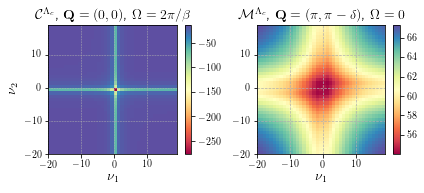

In [26]:
create_mag_den_plot('../data/Phi_mag_NOSE_fill_0.600.txt',
                    '../data/Phi_den_NOSE_fill_0.600.txt',
                    '../images/jup_Phi_color_NOSE_fill0.600.png',0.485)

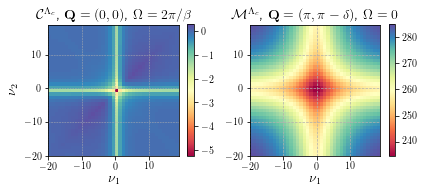

In [27]:
create_mag_den_plot('../data/Phi_mag_SE_fill_0.975.txt',
                    '../data/Phi_den_SE_fill_0.975.txt',
                    '../images/jup_Phi_color_SE_fill0.975.png',0.495)

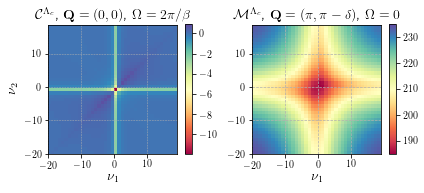

In [28]:
create_mag_den_plot('../data/Phi_mag_SE_fill_0.600.txt',
                    '../data/Phi_den_SE_fill_0.600.txt',
                    '../images/jup_Phi_color_SE_fill0.600.png',0.485)